# Chapter 5. 데이터 분석 - 공개 데이터 분석 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Seaborn Iris Data

In [3]:
data = sns.load_dataset('iris')
data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


## 데이터 정보

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 데이터 요약

In [5]:
data.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## 데이터 개수

In [6]:
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## 결측치 처리

### 결측치 확인

In [7]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## 데이터 조건 추출

In [8]:
setosa = data[data['species'] == 'setosa']
versicolor = data[data['species'] == 'versicolor']
virginica = data[data['species'] == 'virginica']

setosa.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


## 데이터 시각화

### 1). Features Histogram

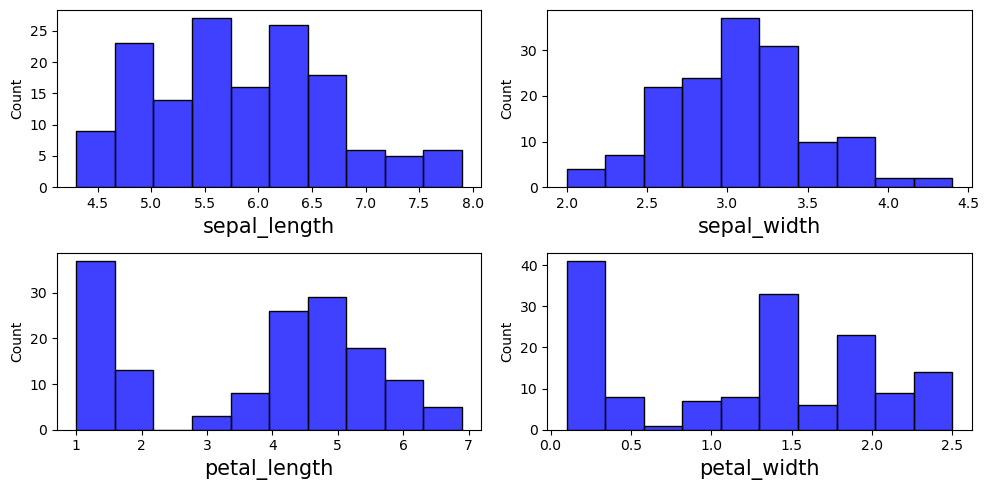

In [9]:
feature_index = data.columns
feature_index = feature_index.drop('species')

plt.figure(figsize = (10,5))

for i in range(len(feature_index)) :
    plt.subplot(2,2,i+1)
    sns.histplot(data[feature_index[i]], bins = 10, color = 'blue')
    plt.xlabel(feature_index[i], fontsize = 15)
    
plt.tight_layout()
plt.show()

### 2). sepal_length by Target Histogram

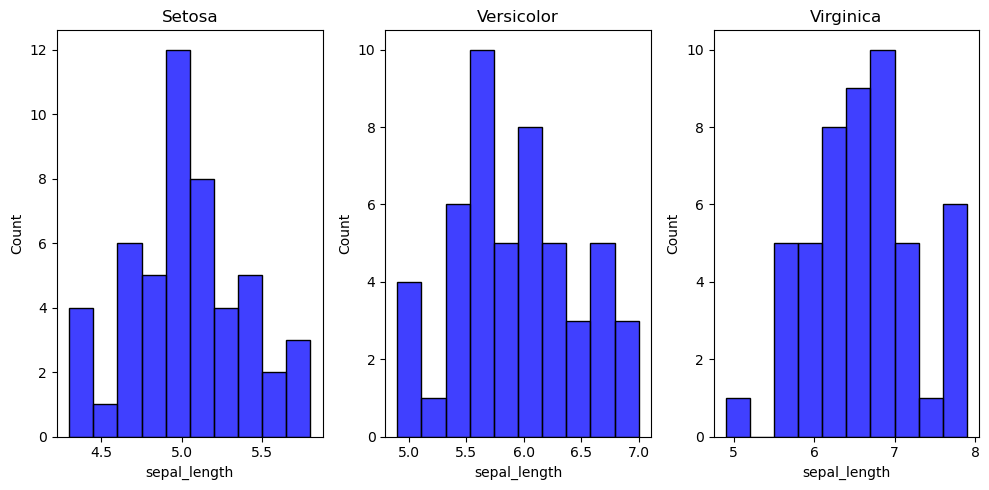

In [10]:
plt.figure(figsize = (10,5))

plt.subplot(1,3,1)
sns.histplot(setosa['sepal_length'], bins = 10, color = 'blue')
plt.title('Setosa')

plt.subplot(1,3,2)
sns.histplot(versicolor['sepal_length'], bins = 10, color = 'blue')
plt.title('Versicolor')

plt.subplot(1,3,3)
sns.histplot(virginica['sepal_length'], bins = 10, color = 'blue')
plt.title('Virginica')


plt.tight_layout()
plt.show()

### 3). Feature by Target Histogram

#### My Answer

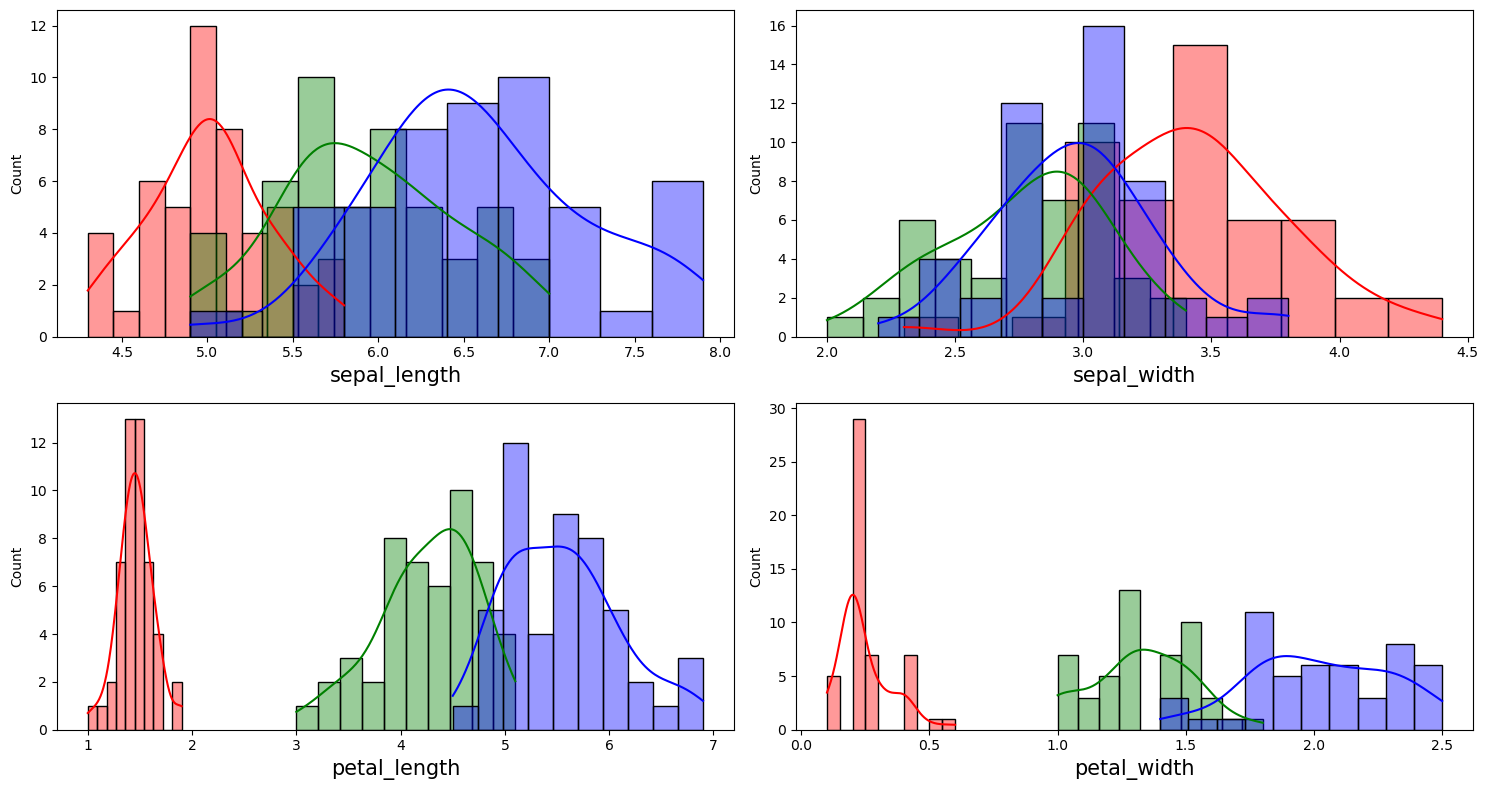

In [11]:
feature_index = data.columns
feature_index = feature_index.drop('species')

plt.figure(figsize = (15,8))

for i in range(len(feature_index)) :
    plt.subplot(2,2,i+1)
    sns.histplot(setosa[feature_index[i]], bins = 10, color = 'r', alpha = 0.4, kde = True)
    sns.histplot(versicolor[feature_index[i]], bins = 10, color = 'g', alpha = 0.4, kde = True)
    sns.histplot(virginica[feature_index[i]], bins = 10, color = 'b', alpha = 0.4, kde = True)
    plt.xlabel(feature_index[i], fontsize = 15)
    
plt.tight_layout()
plt.show()

#### Answer

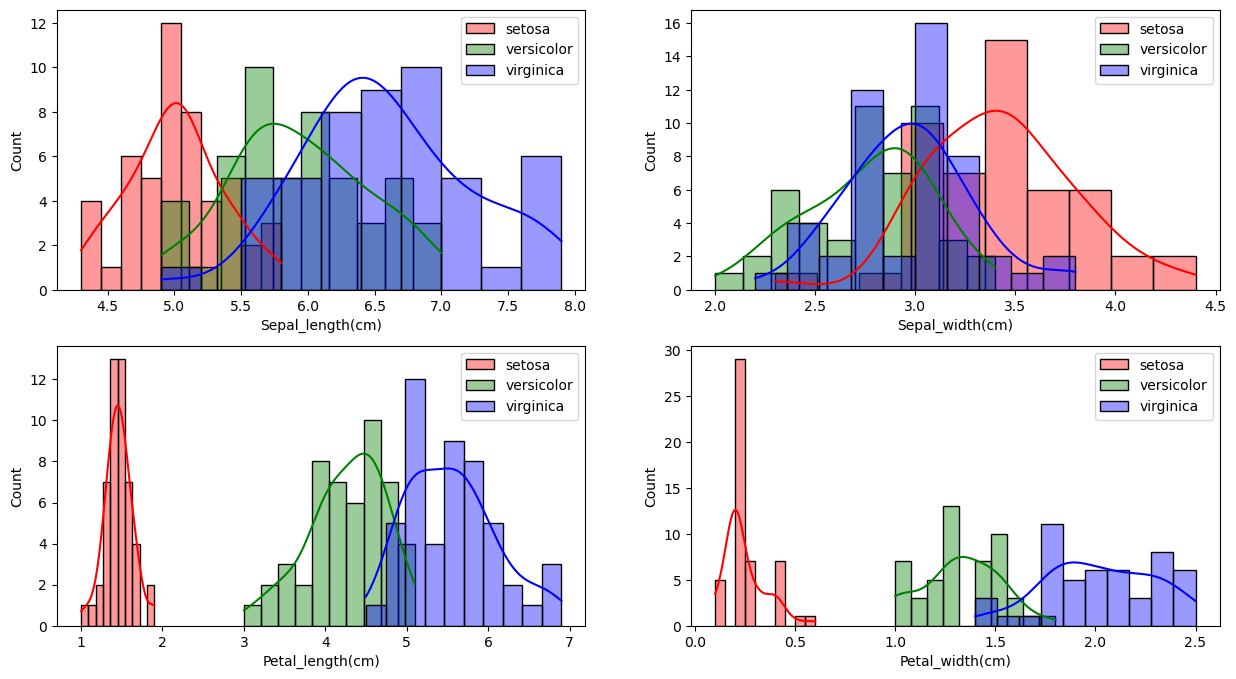

In [12]:
fig, axs = plt.subplots(2, 2, figsize = (15, 8))

features = ['sepal_length','sepal_width','petal_length','petal_width']
colors = ['r','g','b']

for i, feature in enumerate(features) :
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    for j, species in enumerate(data['species'].unique()) :
        sns.histplot(data[data['species'] == species][feature],
                     bins = 10,
                     ax = ax,
                     color = colors[j],
                     kde = True,
                     alpha = 0.4,
                     label = species)
    ax.set_xlabel(feature.capitalize() + '(cm)')
    ax.legend()
    
plt.show()

### 4). Pairplot by Target

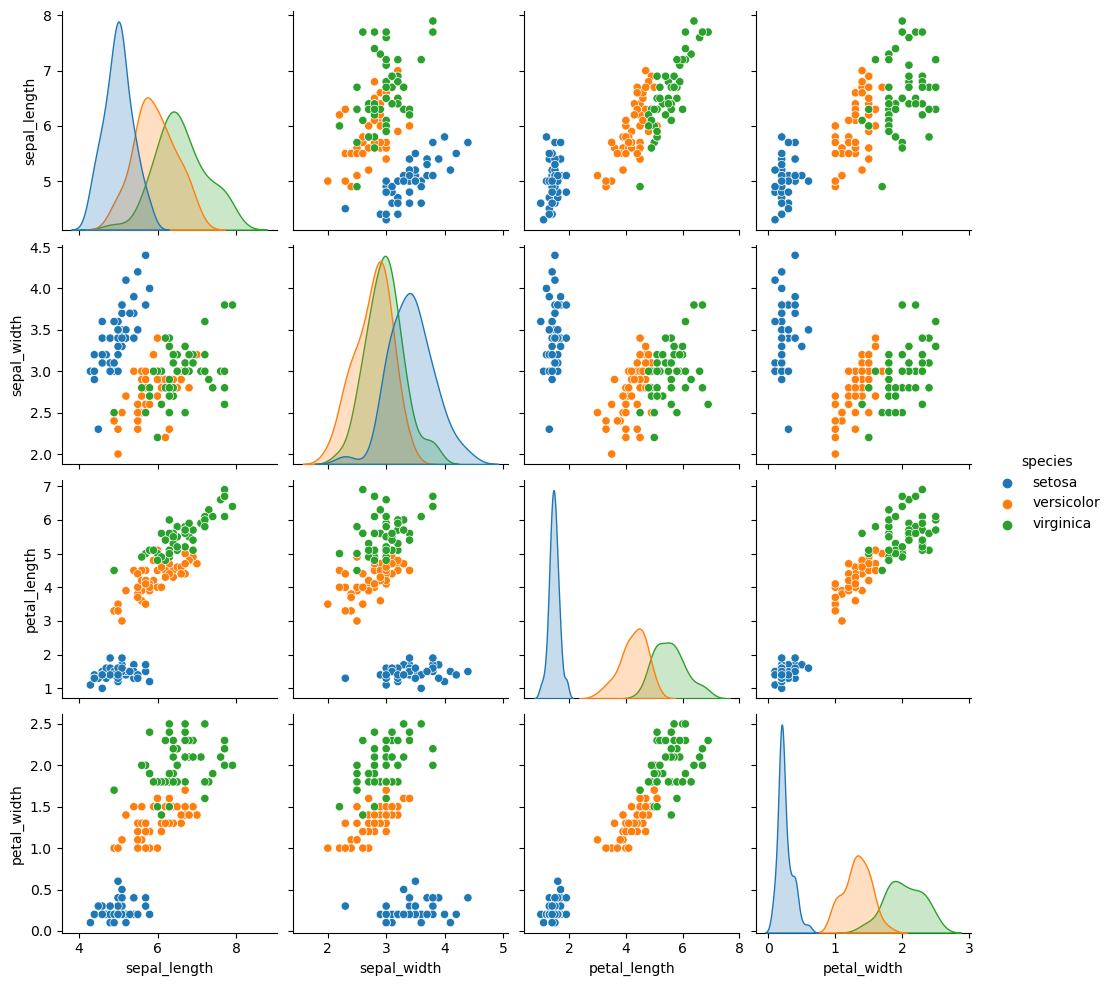

In [13]:
sns.pairplot(data, hue = 'species')

## 상관분석 - Heatmap

<Axes: >

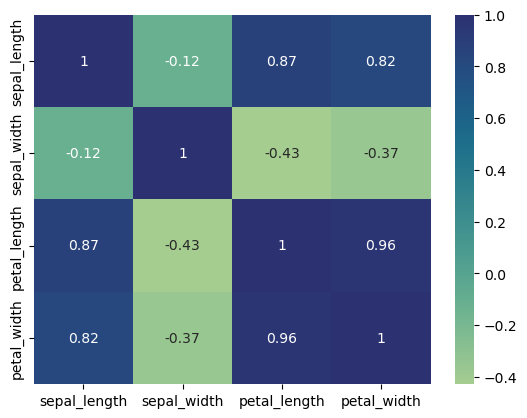

In [14]:
sns.heatmap(data.corr(), cmap = 'crest', annot = True)

# 2. Seaborn Titanic Data

In [15]:
data = sns.load_dataset('titanic')
data.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


## 데이터 정보

In [16]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 결측치 처리

### 결측치 확인

In [17]:
data_null = data.isna().sum()
((data_null[data_null > 0] / len(data)) * 100).sort_values(ascending = False)

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
dtype: float64

### 결측치 제거

In [18]:
data.drop('deck', axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


### 결측치 채우기

In [19]:
data['age'].fillna(data['age'].median, inplace = True)
data['age'].isna().sum()

0

In [20]:
data['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [21]:
data['embarked'].fillna('S', inplace = True)
data['embarked'].isna().sum()

0

In [22]:
data['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [23]:
data['embark_town'].fillna('Southampton', inplace = True)
data['embark_town'].isna().sum()

0

## 데이터 시각화

In [24]:
data.pivot_table(index = 'class', columns = 'who', values = 'survived').round(2)

who,child,man,woman
class,,,
First,0.83,0.35,0.98
Second,1.00,0.08,0.91
Third,0.43,0.12,0.49


In [25]:
import matplotlib

Text(0.5, 1.0, '타이타닉 탑승 인원 생존 분석')

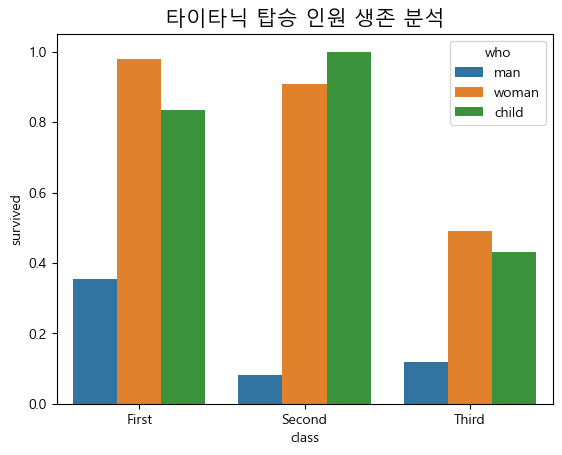

In [26]:
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

sns.barplot(x = 'class', y = 'survived', hue = 'who', data = data, errorbar = None)
plt.title('타이타닉 탑승 인원 생존 분석', fontsize = 15)

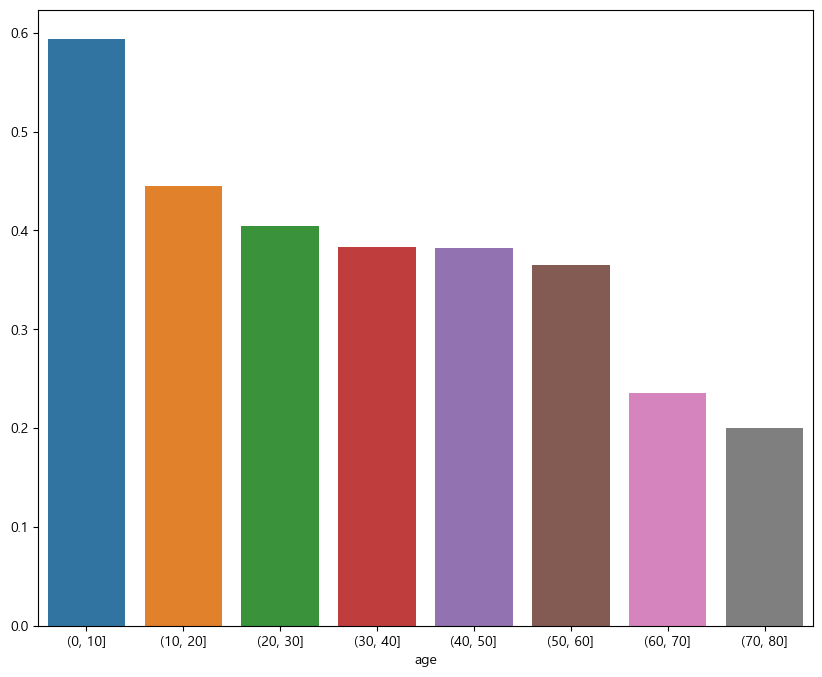

In [27]:
data = sns.load_dataset('titanic')
data_age = data.groupby(pd.cut(data['age'],
                               bins = [i for i in range(0,81,10)]))['survived'].mean()

plt.figure(figsize = (10,8))

sns.barplot(x = data_age.index, y = sorted(data_age.values, reverse = True))

plt.show()

# 3. Kaggle MovieLens Data
* https://www.kaggle.com/datasets/odedgolden/movielens-1m-dataset

In [28]:
movie_data = pd.read_table('./Data/movies.dat', sep = '::', header = None, names = ['MovieID','Title','Genres'])
rating_data = pd.read_table('./Data/ratings.dat', sep = '::', header = None, names = ['UserID','MovieID','Rating','Timestamp'])
user_data = pd.read_table('./Data/users.dat', sep = '::', header = None, names = ['UserID','Gender','Age','Occupation','Zip-code'])

## 데이터 확인

In [29]:
movie_data.head(3)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [30]:
rating_data.head(3)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


In [31]:
user_data.head(3)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117


In [32]:
print(movie_data.shape, rating_data.shape, user_data.shape)

(3883, 3) (1000209, 4) (6040, 5)


## 1). 성별에 따른 평점 TOP 5
* 단, TOP 5에 들어가는 영화는 최소 250명 이상이 평가한 데이터만 취급한다.

### Merge

In [33]:
df = pd.merge(pd.merge(rating_data, user_data), movie_data)
df.head(3)

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama


### Over 250

In [34]:
over250 = df.groupby('Title').size()
index = over250[over250 >= 250].index
index

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='Title', length=1216)

### Male TOP 5

In [35]:
df_gender = df.pivot_table('Rating', index = 'Title', columns = 'Gender').loc[index]
df_gender.sort_values(by = 'M', ascending = False).loc[:,'M'].head(5)

Title
Godfather, The (1972)                                                  4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.576628
Shawshank Redemption, The (1994)                                       4.560625
Raiders of the Lost Ark (1981)                                         4.520597
Usual Suspects, The (1995)                                             4.518248
Name: M, dtype: float64

### Female TOP 5

In [36]:
df_gender = df.pivot_table('Rating', index = 'Title', columns = 'Gender').loc[index]
df_gender.sort_values(by = 'F', ascending = False).loc[:,'F'].head(5)

Title
Close Shave, A (1995)                                     4.644444
Wrong Trousers, The (1993)                                4.588235
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)             4.572650
Wallace & Gromit: The Best of Aardman Animation (1996)    4.563107
Schindler's List (1993)                                   4.562602
Name: F, dtype: float64

## 2). 연령별 평점 TOP 5

In [37]:
df = df[df.Age >= 10]

def clf_age(age) :
    return (age // 10) * 10

agegroup = df.Age.apply(clf_age)
df['Agegroup'] = agegroup
df['Agegroup'].value_counts()

20    395556
30    199003
10    183536
50    111270
40     83633
Name: Agegroup, dtype: int64

### Teenager TOP 5

In [38]:
df_age = df.pivot_table('Rating', index = 'Title', columns = 'Agegroup').loc[index]
df_age.sort_values(by = 10, ascending = False).loc[:,10].head(5)

Title
Usual Suspects, The (1995)                                             4.680798
Shawshank Redemption, The (1994)                                       4.674569
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.604938
Close Shave, A (1995)                                                  4.568000
Life Is Beautiful (La Vita è bella) (1997)                             4.549180
Name: 10, dtype: float64

# 4. Github US Baby Names Data
* https://github.com/ankane/age/blob/master/names/yob1880.txt

## 데이터 불러오기

In [39]:
dfs = []

for y in range(1880, 2011) :
    df = pd.read_csv('./Data/yob{}.txt'.format(y), names = ['name','gender','births'])
    df['year'] = y
    dfs.append(df)

data = pd.concat(dfs)
data

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


## 1). 연도별 남여 출생아 수

<Axes: xlabel='year'>

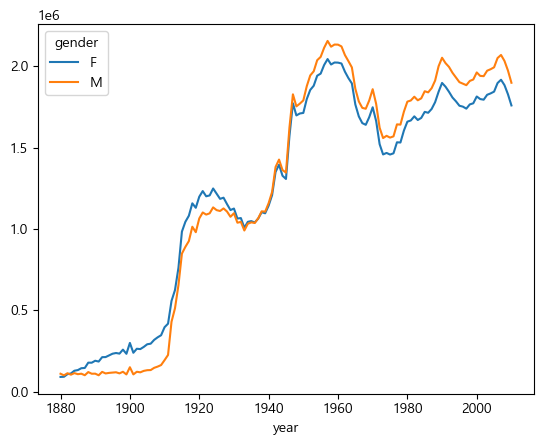

In [40]:
data.pivot_table('births', index = 'year', columns = 'gender', aggfunc = 'sum').plot()

## 2). 연도별 이름별 출생아 수

In [41]:
data.pivot_table('births', index = 'year', columns = 'name', aggfunc = 'sum')

name,Aaban,Aabid,Aabriella,Aadam,Aadan,Aadarsh,Aaden,Aadesh,Aadhav,Aadhavan,...,Zyrus,Zysean,Zyshaun,Zyshawn,Zyshon,Zyshonne,Zytavious,Zyvion,Zyyanna,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,NaN,NaN,9.0,NaN,14.0,55.0,NaN,5.0,NaN,...,NaN,NaN,5.0,5.0,NaN,NaN,7.0,NaN,NaN,NaN
2007,5.0,NaN,NaN,8.0,8.0,13.0,155.0,NaN,NaN,NaN,...,NaN,NaN,7.0,11.0,NaN,NaN,6.0,NaN,NaN,NaN
2008,NaN,NaN,5.0,6.0,22.0,13.0,955.0,NaN,NaN,NaN,...,9.0,NaN,6.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN


## 3). 이름의 마지막 글자별 연도별 출생아 수

In [42]:
data['name'].str[-1]

0        y
1        a
2        a
3        h
4        e
        ..
33833    e
33834    e
33835    s
33836    n
33837    x
Name: name, Length: 1690784, dtype: object

In [43]:
last_str = data['name'].str[-1]
data.pivot_table('births', index = last_str, columns = 'year', aggfunc = 'sum')

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
name,,,,,,,,,,,,,,,,,,,,,
a,32222.0,32348.0,37309.0,39087.0,44497.0,46121.0,49875.0,49642.0,60261.0,59335.0,...,712542.0,719816.0,740453.0,749091.0,764195.0,789547.0,787433.0,756306.0,729907.0,699043.0
b,509.0,470.0,506.0,452.0,496.0,441.0,452.0,434.0,468.0,389.0,...,51344.0,49616.0,48409.0,46515.0,43513.0,42967.0,42532.0,40353.0,39297.0,39309.0
c,349.0,331.0,354.0,304.0,319.0,301.0,283.0,261.0,305.0,271.0,...,27652.0,27845.0,28346.0,27441.0,26691.0,27268.0,27639.0,26244.0,24979.0,24071.0
d,9786.0,8994.0,10436.0,9606.0,10772.0,10076.0,10717.0,10060.0,11898.0,11541.0,...,65349.0,59911.0,57155.0,55517.0,54235.0,55010.0,53950.0,51149.0,49036.0,47005.0
e,46871.0,46486.0,55012.0,55105.0,62726.0,63664.0,68359.0,67565.0,82494.0,81052.0,...,461402.0,460387.0,466968.0,465845.0,463428.0,473235.0,478120.0,473718.0,458178.0,442845.0
f,108.0,83.0,135.0,106.0,131.0,115.0,112.0,124.0,140.0,124.0,...,1788.0,1854.0,1858.0,1935.0,2024.0,2028.0,2141.0,2258.0,2294.0,2352.0
g,154.0,151.0,158.0,143.0,184.0,193.0,159.0,142.0,234.0,152.0,...,2659.0,2659.0,2542.0,2355.0,2381.0,2392.0,2555.0,2518.0,2882.0,3323.0
h,8912.0,8550.0,9743.0,9626.0,10844.0,10679.0,11233.0,11092.0,13268.0,13087.0,...,205621.0,210358.0,211851.0,212380.0,219417.0,232724.0,237774.0,235785.0,237357.0,231514.0
i,261.0,284.0,288.0,243.0,242.0,239.0,256.0,244.0,322.0,288.0,...,66208.0,71777.0,73666.0,77180.0,80970.0,86445.0,91020.0,96031.0,96886.0,98776.0


## 4). 이름의 마지막 글자별, 성별, 연도별 출생아 수

In [44]:
data.pivot_table('births', index = last_str, columns = ['gender','year'], aggfunc = 'sum')

gender        F                                                        \
year       1880     1881     1882     1883     1884     1885     1886   
name                                                                    
a       31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c           NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d         609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e       33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g           7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h        4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i          61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k          13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l        2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m          58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n        3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o          30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r         481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s        1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t        2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u         380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w           NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x           NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y       10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z         106.0     95.0    106.0    141.0    148.0    150.0    202.0   

gender                             ...         M                      \
year       1887     1888     1889  ...      2001      2002      2003   
name                               ...                                 
a       48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b           NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c           NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d        1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e       54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
f           NaN      NaN      NaN  ...    1758.0    1817.0    1819.0   
g          25.0     44.0     28.0  ...    2151.0    2084.0    2009.0   
h        7141.0   8630.0   8826.0  ...   85959.0   88085.0   88226.0   
i         105.0    141.0    134.0  ...   20980.0   23610.0   26011.0   
j           NaN      NaN      NaN  ...    1069.0    1088.0    1203.0   
k          19.0     21.0     22.0  ...   42477.0   42043.0   42296.0   
l        6175.0   7900.0   8395.0  ...  153648.0  153493.0  153862.0   
m          90.0    123.0    137.0  ...   41967.0   42663.0   42790.0   
n        5512.0   6833.0   7103.0  ...  616099.0  630322.0  663419.0   
o          97.0    134.0    142.0  ...   82146.0   83180.0   85423.0   
p           NaN      NaN      NaN  ...    3419.0    3157.0    2982.0   
q           NaN      NaN      NaN  ...     602.0     618.0     585.0   
r         910.0   1207.0   1214.0  ...  165377.0  164821.0  169878.0   
s        2803.0   3582.0   3569.0  ...  143791.0  139595.0  138632.0   
t        3140.0   3816.0   3784.0  ...   47688.0   44991.0   43765.0   
u         476.0    541.0    469.0  ...    1833.0    1819.0    2052.0   
v           NaN      NaN      NaN  ...    1209.0    1332.0    1652.0   
w           NaN      NaN      NaN  ...   52265.0   50103.0   49079.0   
x         

## 5). 남자 아이 이름의 마지막 글자별 연도별 출생아 수

In [45]:
data.pivot_table('births', index = last_str, columns = ['gender','year'], aggfunc = 'sum').loc[:, 'F']

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
name,,,,,,,,,,,,,,,,,,,,,
a,31446.0,31581.0,36536.0,38330.0,43680.0,45408.0,49100.0,48942.0,59442.0,58631.0,...,673418.0,681001.0,702628.0,710441.0,727357.0,753391.0,752779.0,723405.0,698477.0,670605.0
b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,394.0,332.0,344.0,601.0,369.0,367.0,409.0,408.0,435.0,450.0
c,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,539.0,607.0,649.0,663.0,613.0,633.0,775.0,926.0,931.0,946.0
d,609.0,607.0,734.0,810.0,916.0,862.0,1007.0,1027.0,1298.0,1374.0,...,4511.0,4082.0,3764.0,3763.0,3565.0,3600.0,3355.0,3239.0,2864.0,2607.0
e,33378.0,34080.0,40399.0,41914.0,48089.0,49616.0,53884.0,54353.0,66750.0,66663.0,...,316007.0,315736.0,322199.0,323747.0,322305.0,330236.0,334422.0,332752.0,322682.0,313833.0
f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.0,37.0,39.0,31.0,39.0,60.0,51.0,63.0,82.0,97.0
g,7.0,5.0,12.0,8.0,24.0,11.0,18.0,25.0,44.0,28.0,...,508.0,575.0,533.0,518.0,499.0,463.0,515.0,459.0,486.0,657.0
h,4863.0,4784.0,5567.0,5701.0,6602.0,6624.0,7146.0,7141.0,8630.0,8826.0,...,119662.0,122273.0,123625.0,122760.0,126920.0,134247.0,138360.0,135535.0,137378.0,133424.0
i,61.0,78.0,81.0,76.0,84.0,92.0,85.0,105.0,141.0,134.0,...,45228.0,48167.0,47655.0,48680.0,49653.0,52887.0,55789.0,57880.0,55974.0,55820.0


## 6). 1880년 출생한 남자 아이 이름의 마지막 글자별 출생아 수

In [46]:
data.pivot_table('births', index = last_str, columns = ['gender','year'], aggfunc = 'sum').loc[:, 'F'].loc[:,1880]

name
a    31446.0
b        NaN
c        NaN
d      609.0
e    33378.0
f        NaN
g        7.0
h     4863.0
i       61.0
j        NaN
k       13.0
l     2541.0
m       58.0
n     3008.0
o       30.0
p        NaN
q        NaN
r      481.0
s     1391.0
t     2152.0
u      380.0
v        NaN
w        NaN
x        NaN
y    10469.0
z      106.0
Name: 1880, dtype: float64

## 7). 남자 아이 이름의 마지막 글자 TOP5의 연도별 추이

<Axes: xlabel='year'>

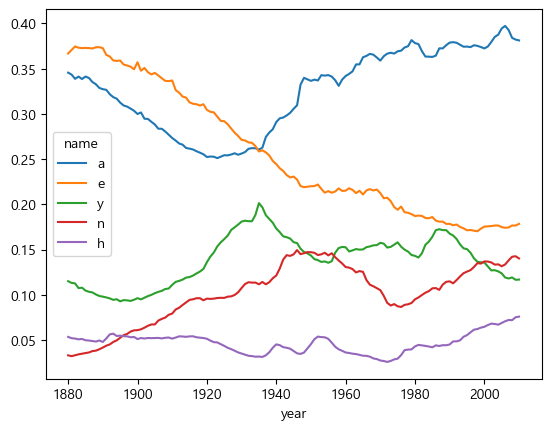

In [47]:
last_names = data.pivot_table('births', index = last_str, columns = ['gender','year'], aggfunc = 'sum')
last_names_f = last_names.loc[:,'F']
top5 = last_names_f.sum(axis = 1).sort_values(ascending = False).index[:5]
(last_names_f / last_names_f.sum()).loc[top5].T.plot()